In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from dbhelper import pd_query
import datetime
import statsmodels.api as sm

In [19]:
query = '''
        select 
            c.date,
            waittime,
            year,
            month,
            dayofmonth
        from crossingdata c
        join datefeatures d on c.date = d.date
        where
            valid=1
            and waittime is not null
            and crossing_id = 1
        order by c.date;
        '''

df = pd_query(query)

In [8]:
lowess = sm.nonparametric.lowess

In [20]:
df = df.set_index('date')

## Start with smoothing over entire series even for periods of sparse data to verify that smoothing works as expected

In [22]:
z = lowess(df.waittime, df.index, frac=12./len(df), it=1)

df['smooth'] = z[:,1]
df.smooth = df.smooth.clip_lower(0)

In [23]:
def plot_day(df, year, month, day):
    plt.figure(figsize=(14,4))
    plt.plot(df[(df.year == year) & (df.month == month) & 
                  (df.dayofmonth == day)]['waittime']);
    plt.plot(df[(df.year == year) & (df.month == month) & 
                  (df.dayofmonth == day)]['smooth']);

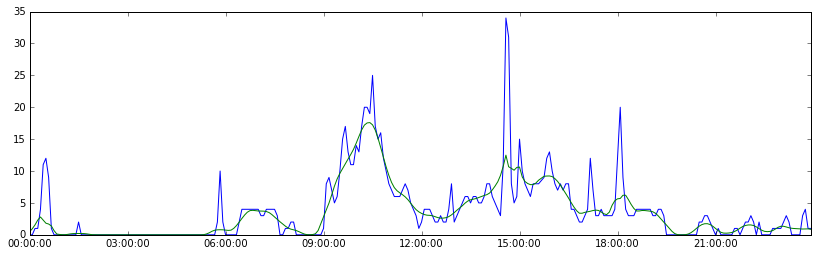

In [24]:
plot_day(df, 2011, 11, 30)

In [25]:
df.head()

,waittime,year,month,dayofmonth,smooth
date,,,,,
2007-01-01 00:00:00,0,2007,1,1,0.000000
2007-01-01 00:05:00,0,2007,1,1,0.000000
2007-01-01 00:10:00,0,2007,1,1,0.258356
2007-01-01 00:15:00,0,2007,1,1,0.511536
2007-01-01 00:20:00,0,2007,1,1,0.734039


In [26]:
dfcsv = df.reset_index()[['date', 'smooth']]
dfcsv['munger_id'] = 2
dfcsv['crossing_id'] = 1

In [27]:
dfcsv.to_csv('../data/munge2.csv', columns=['munger_id', 'crossing_id', 'date', 'smooth'], index=False, header=False)

## Note that plots across empty spans will be connected

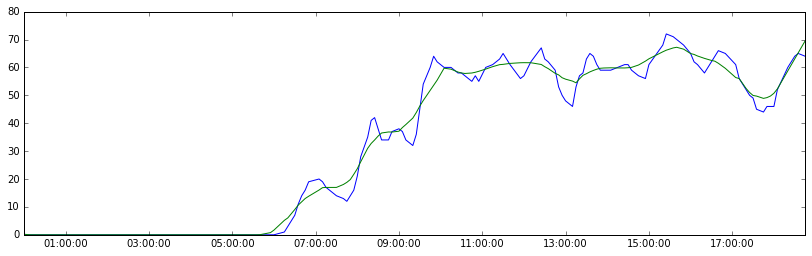

In [30]:
plot_day(df, 2008, 6, 27)

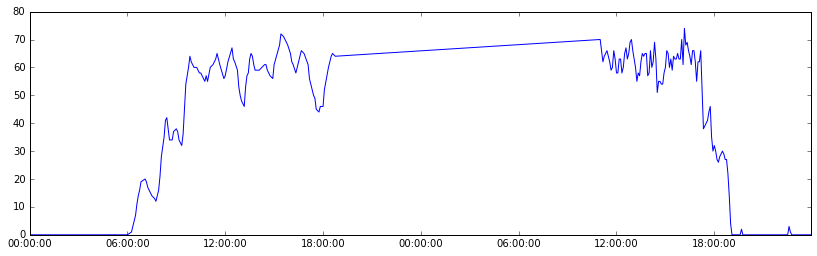

In [32]:
plt.figure(figsize=(14,4))
plt.plot(df[(df.index >= '2008-06-27') & (df.index < '2008-06-29')]['waittime']);

In [42]:
query = '''
        select d.date, waittime
        from datefeatures d
        left join mungedata m
        on m.date = d.date
        and munger_id = 2
        where
            d.date >= '2008-06-27' and d.date < '2008-06-29'
        '''

dftest = pd_query(query)
dftest = dftest.set_index('date')

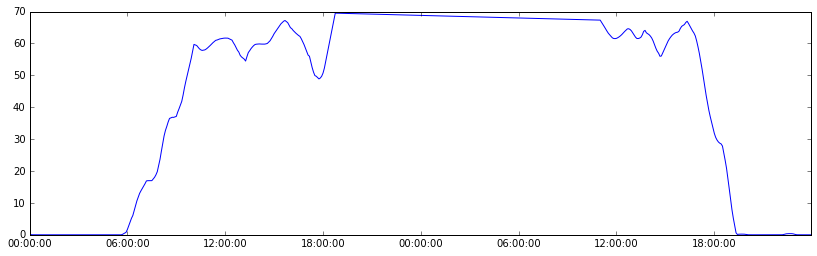

In [43]:
plt.figure(figsize=(14,4))
plt.plot(dftest['waittime']);

In [44]:
pd.isnull(dftest).sum()

waittime    259
dtype: int64

## Even with nulls, matplotlib is spanning gaps

In [49]:
from dbhelper import get_crossings
get_crossings()

,location_id,lane_id,direction_id,location_name,lane_name,direction_name
id,,,,,,
15,136,0,0,Lynden,Car,Northbound
16,136,0,1,Lynden,Car,Southbound
17,136,4,0,Lynden,Truck,Northbound
18,136,4,1,Lynden,Truck,Southbound
8,135,2,0,Pacific Highway,Bus,Northbound
7,135,2,1,Pacific Highway,Bus,Southbound
6,135,0,0,Pacific Highway,Car,Northbound
5,135,0,1,Pacific Highway,Car,Southbound
10,135,3,0,Pacific Highway,Fast,Northbound


## Smooth data for Pacific Highway South

In [45]:
query = '''
        select 
            c.date,
            waittime,
            year,
            month,
            dayofmonth
        from crossingdata c
        join datefeatures d on c.date = d.date
        where
            valid=1
            and waittime is not null
            and crossing_id = 5
        order by c.date;
        '''

df = pd_query(query)

In [46]:
z = lowess(df.waittime, df.index, frac=12./len(df), it=1)

df['smooth'] = z[:,1]
df.smooth = df.smooth.clip_lower(0)

In [47]:
dfcsv = df.reset_index()[['date', 'smooth']]
dfcsv['munger_id'] = 2
dfcsv['crossing_id'] = 5
dfcsv.to_csv('../data/munge2_5.csv', columns=['munger_id', 'crossing_id', 'date', 'smooth'], index=False, header=False)

## Smooth data for Sumas South

In [50]:
query = '''
        select 
            c.date,
            waittime,
            year,
            month,
            dayofmonth
        from crossingdata c
        join datefeatures d on c.date = d.date
        where
            valid=1
            and waittime is not null
            and crossing_id = 20
        order by c.date;
        '''

df = pd_query(query)

z = lowess(df.waittime, df.index, frac=12./len(df), it=1)

df['smooth'] = z[:,1]
df.smooth = df.smooth.clip_lower(0)

dfcsv = df.reset_index()[['date', 'smooth']]
dfcsv['munger_id'] = 2
dfcsv['crossing_id'] = 20
dfcsv.to_csv('../data/munge2_20.csv', columns=['munger_id', 'crossing_id', 'date', 'smooth'], index=False, header=False)

## Lynden South

In [51]:
query = '''
        select 
            c.date,
            waittime,
            year,
            month,
            dayofmonth
        from crossingdata c
        join datefeatures d on c.date = d.date
        where
            valid=1
            and waittime is not null
            and crossing_id = 16
        order by c.date;
        '''

df = pd_query(query)

z = lowess(df.waittime, df.index, frac=12./len(df), it=1)

df['smooth'] = z[:,1]
df.smooth = df.smooth.clip_lower(0)

dfcsv = df.reset_index()[['date', 'smooth']]
dfcsv['munger_id'] = 2
dfcsv['crossing_id'] = 16
dfcsv.to_csv('../data/munge2_16.csv', columns=['munger_id', 'crossing_id', 'date', 'smooth'], index=False, header=False)